In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from Evolver import *
from Simulator import *
from Mazes import *
from World import *

pygame 2.6.1 (SDL 2.28.4, Python 3.13.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\pfcor\PycharmProjects\Projeto_agentes\.venv\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [10]:
world = World()

maze_id = 4
load_maze(world, maze_id)

ev = Evolver(
    world_template=world,
    population_size=100,
    num_generations=40,
    mutation_rate=0.05,
    tournament_size=3,
    novelty_weight=10,
    archive_add=5,
    num_steps=30
)

best_agent = ev.run()

best_obj = best_agent.objective_score
best_nov = best_agent.novelty_score
best_comb = best_agent.combined_fitness

print("\nEVOLUTION COMPLETE")
print("Objective fitness:", best_obj)
print("Novelty score:", best_nov)
print("Combined fitness:", best_comb)

world = World()
load_maze(world, maze_id)

best_agent.x = ev.start_x
best_agent.y = ev.start_y
best_agent.step_index = 0
best_agent.moves_left = len(best_agent.genotype)
best_agent.behavior = set()
best_agent.path = []

world.place(best_agent)

run_maze(world)

Starting evolution...
Gen 1/40 | Avg: -0.75 | Best: 2.56 (obj=-7.44, nov=1.00)
Gen 2/40 | Avg: -3.78 | Best: 1.65 (obj=-7.44, nov=0.91)
Gen 3/40 | Avg: -4.99 | Best: -3.32 (obj=-9.80, nov=0.65)
Gen 4/40 | Avg: -7.82 | Best: -3.63 (obj=-10.30, nov=0.67)
Gen 5/40 | Avg: -7.87 | Best: -5.30 (obj=-10.30, nov=0.50)
Gen 6/40 | Avg: -7.88 | Best: -5.68 (obj=-7.44, nov=0.18)
Gen 7/40 | Avg: -8.35 | Best: -2.31 (obj=-5.94, nov=0.36)
Gen 8/40 | Avg: -7.52 | Best: -3.07 (obj=-5.94, nov=0.29)
Gen 9/40 | Avg: -7.04 | Best: -3.01 (obj=-4.30, nov=0.13)
Gen 10/40 | Avg: -6.81 | Best: -2.97 (obj=-5.30, nov=0.23)
Gen 11/40 | Avg: -6.71 | Best: -3.01 (obj=-4.30, nov=0.13)
Gen 12/40 | Avg: -6.83 | Best: -3.73 (obj=-4.30, nov=0.06)
Gen 13/40 | Avg: -6.39 | Best: -3.73 (obj=-4.30, nov=0.06)
Gen 14/40 | Avg: -6.31 | Best: -3.73 (obj=-4.30, nov=0.06)
Gen 15/40 | Avg: -6.48 | Best: -4.01 (obj=-4.30, nov=0.03)
Gen 16/40 | Avg: -5.82 | Best: -4.01 (obj=-4.30, nov=0.03)
Gen 17/40 | Avg: -6.04 | Best: 0.87 (obj=-0

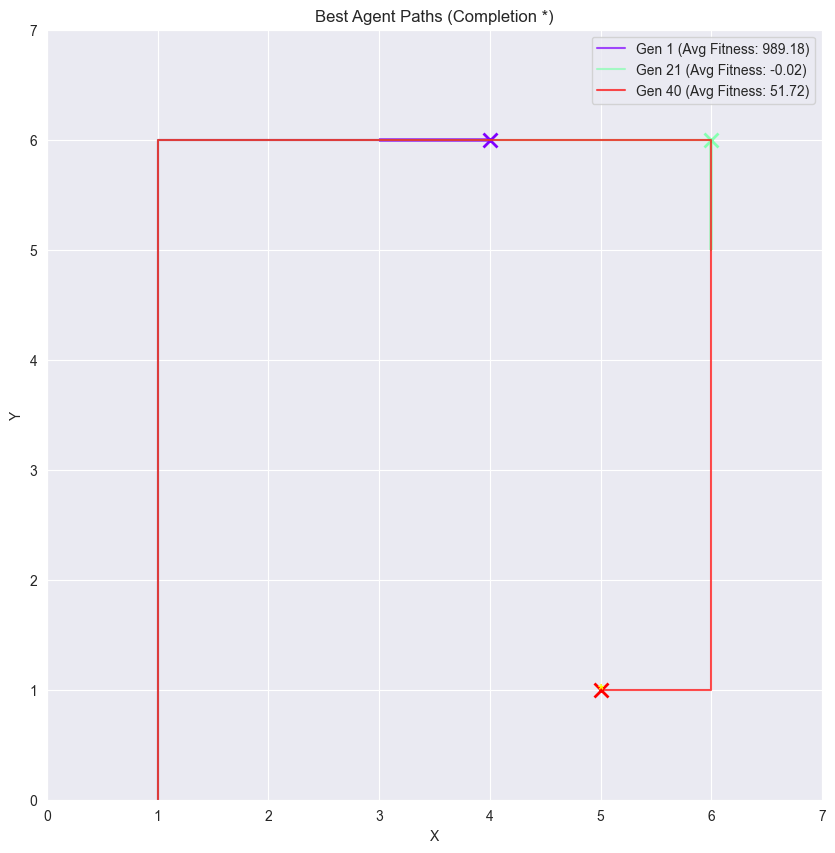

In [5]:
completion_x, completion_y = world.completion.x, world.completion.y

# GRÁFICO 1: Caminhos dos melhores agentes em gerações selecionadas
fig, ax = plt.subplots(figsize=(10, 10))
colors = cm.rainbow(np.linspace(0, 1, len(ev.best_paths)))

# Adicionar label da completion
ax.text(completion_x, completion_y, '*', color='yellow', fontsize=12,
        ha='center', va='center', fontweight='bold')

# Plotar caminhos das três gerações
plot_gens = [0, len(ev.best_paths)//2, len(ev.best_paths)-1]
for i in plot_gens:
    path = ev.best_paths[i]
    avg_fitness = ev.avg_fitness_history[i]
    x_vals = [p[0] for p in path]
    y_vals = [p[1] for p in path]
    ax.plot(x_vals, y_vals, color=colors[i], label=f"Gen {i+1} (Avg Fitness: {avg_fitness:.2f})", alpha=0.7)
    ax.plot(x_vals[-1], y_vals[-1], 'x', color=colors[i], markersize=10, markeredgewidth=2)

ax.set_xlim(0, world.rows)
ax.set_ylim(0, world.cols)
ax.set_title("Best Agent Paths (Completion *)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()
plt.grid(True)
plt.show()

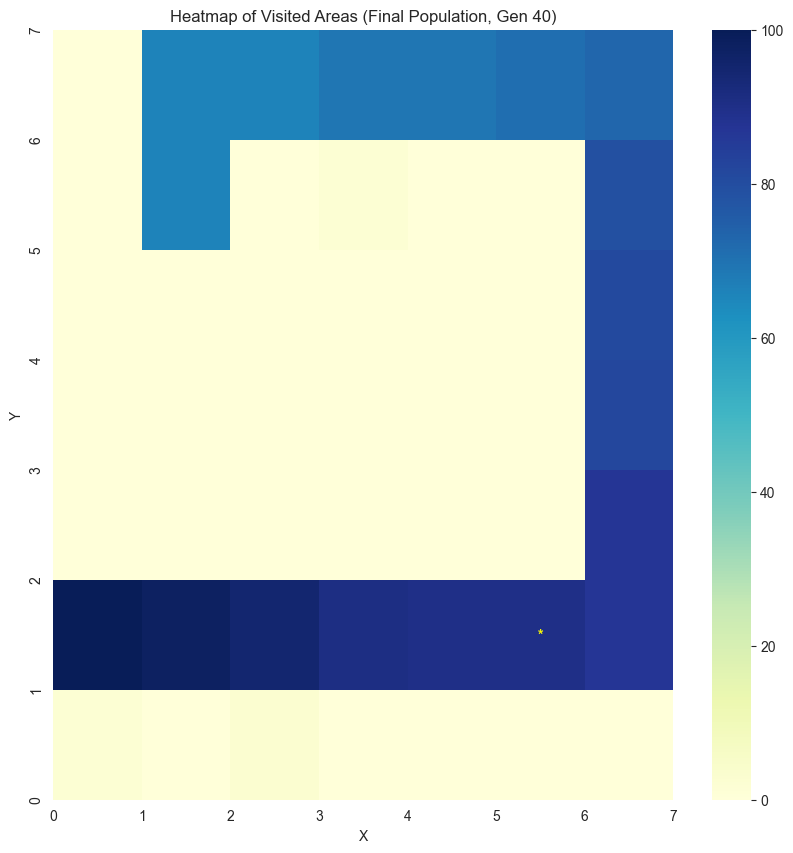

In [13]:
heatmap = np.zeros((world.rows, world.cols))
final_visited_maps = [agent.behavior for agent in ev.population]

for visited in final_visited_maps:
    for (x, y) in visited:
        heatmap[x][y] += 1

plt.figure(figsize=(10, 10))
ax = sns.heatmap(heatmap, cmap="YlGnBu")
tick_locations = np.arange(0, max(world.rows, world.cols)+1, max(1, max(world.rows, world.cols)//5))
ax.set_xticks(tick_locations)
ax.set_yticks(tick_locations)
ax.set_xticklabels(tick_locations)
ax.set_yticklabels(tick_locations)
ax.invert_yaxis()  # coloca y=0 no topo

# Adicionar label da completion
plt.text(completion_x + 0.5, completion_y + 0.5, '*', color='yellow', fontsize=10,
         ha='center', va='center', fontweight='bold')

plt.title(f"Heatmap of Visited Areas (Final Population, Gen {ev.NGEN})")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

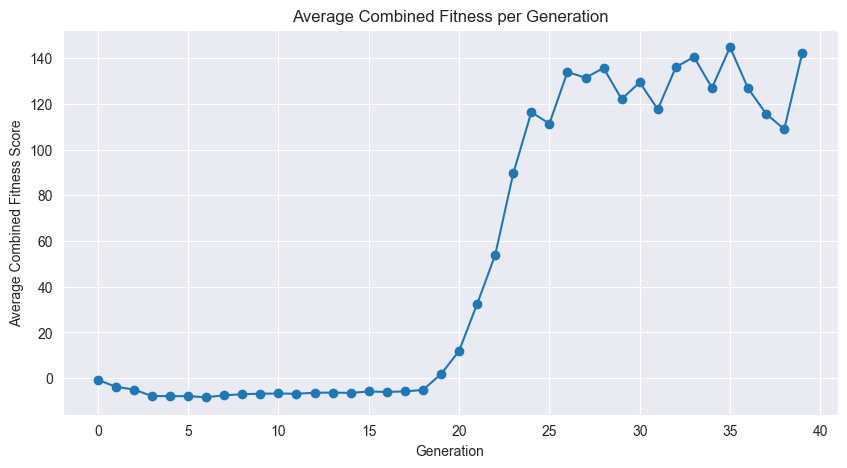

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(range(ev.NGEN), ev.avg_fitness_history, marker='o')
plt.title("Average Combined Fitness per Generation")
plt.xlabel("Generation")
plt.ylabel("Average Combined Fitness Score")
plt.grid(True)
plt.show()

In [14]:

# Número de episódios de teste
num_episodes = 20
maze_id = 4

# Armazenar métricas
steps_to_goal = []
successes = 0
rewards = []

for ep in range(num_episodes):
    world_test = World()
    load_maze(world_test, maze_id)

    # Reset do agente para o episódio
    best_agent.reset()
    world_test.place(best_agent)

    # Contar passos
    step_count = 0
    while best_agent.has_moves() and (best_agent.x, best_agent.y) != (world_test.completion.x, world_test.completion.y):
        best_agent.act(world_test)
        step_count += 1

    # Avaliar sucesso
    success = (best_agent.x, best_agent.y) == (world_test.completion.x, world_test.completion.y)
    if success:
        successes += 1

    # Guardar métricas
    steps_to_goal.append(step_count)

# Estatísticas
avg_steps = sum(steps_to_goal) / num_episodes
success_rate = successes / num_episodes
avg_reward = sum(rewards) / num_episodes

print(f"Test Mode Results over {num_episodes} episodes:")
print(f"Average steps to goal: {avg_steps:.2f}")
print(f"Success rate: {success_rate * 100:.1f}%")


Test Mode Results over 20 episodes:
Average steps to goal: 18.00
Success rate: 100.0%
